In [1]:
###Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hw_df=pd.read_csv("E://Datasets//New Dataset//weight_height.csv")
hw_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
### Finding shape of dataset.
hw_df.shape

(10000, 3)

In [6]:
### Describing the dataset.
hw_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


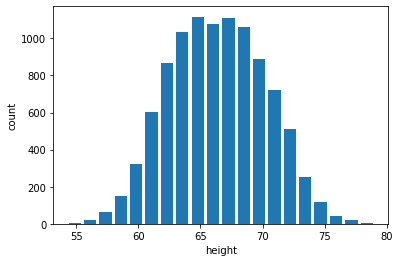

In [9]:
### Plotting data using Histogram to understand the distribuution of data.
plt.hist(hw_df.Height,bins=20,rwidth=0.8)
plt.xlabel("height")
plt.ylabel("count")
plt.show()

In [10]:
### Finding minimm and maximm height values.
hw_df.Height.min()

54.2631333250971

In [11]:
hw_df.Height.max()

78.99874234638959

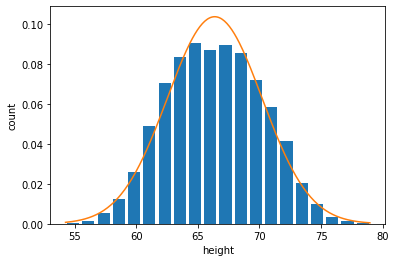

In [12]:
### Finding the bell curve for nommal Distribution.
from scipy.stats import norm
plt.hist(hw_df.Height,bins=20,rwidth=0.8,density=True)
plt.xlabel("height")
plt.ylabel("count")

range=np.arange(hw_df.Height.min(),hw_df.Height.max(),0.1)
plt.plot(range,norm.pdf(range,hw_df.Height.mean(),hw_df.Height.std()))


### Finding the outliers using 3 STD method.


In [15]:
### Calculating the upperlimit and lowerlimit of Height columns.
upper_limit=hw_df.Height.mean()+3*hw_df.Height.std()
print("Upper_Limit :",upper_limit)

lower_limit=hw_df.Height.mean()-3*hw_df.Height.std()
print("Lower_Limit :",lower_limit)


Upper_Limit : 77.91014411714076
Lower_Limit : 54.82497539250136


In [18]:
### Finding the outlires in our dataset
outlier_data=hw_df[(hw_df['Height']>upper_limit)| (hw_df['Height']<lower_limit)]
print(outlier_data)

      Gender     Height      Weight
994     Male  78.095867  255.690835
1317    Male  78.462053  227.342565
2014    Male  78.998742  269.989699
3285    Male  78.528210  253.889004
3757    Male  78.621374  245.733783
6624  Female  54.616858   71.393749
9285  Female  54.263133   64.700127


In [22]:
### Removing the outliers from dataset.
new_hw=hw_df[(hw_df['Height']<upper_limit) & (hw_df['Height']>lower_limit)]
new_hw.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [23]:
new_hw.shape

(9993, 3)

In [25]:
### How many outliers we removed.
hw_df.shape[0]-new_hw.shape[0]

7

### Removing Otliers using Z-Score Method.

In [53]:
hw_df['Z-Score']=(hw_df['Height']-hw_df['Height'].mean())/hw_df['Height'].std()

In [54]:
hw_df.head()
print(hw_df.shape)

(10000, 4)


In [60]:
### Finding the outliers from dataset.
outliers=hw_df[(hw_df['Z-Score']>3)|(hw_df['Z-Score']<-3)]
print(outliers)

      Gender     Height      Weight   Z-Score
994     Male  78.095867  255.690835  3.048271
1317    Male  78.462053  227.342565  3.143445
2014    Male  78.998742  269.989699  3.282934
3285    Male  78.528210  253.889004  3.160640
3757    Male  78.621374  245.733783  3.184854
6624  Female  54.616858   71.393749 -3.054091
9285  Female  54.263133   64.700127 -3.146027


In [61]:
outliers_free_df=hw_df[(hw_df['Z-Score']<3)&(hw_df['Z-Score']>-3)]
print(outliers_free_df.head())
print(outliers_free_df.shape)

  Gender     Height      Weight   Z-Score
0   Male  73.847017  241.893563  1.943964
1   Male  68.781904  162.310473  0.627505
2   Male  74.110105  212.740856  2.012343
3   Male  71.730978  220.042470  1.393991
4   Male  69.881796  206.349801  0.913375
(9993, 4)


In [62]:
outliers_free_df

,Gender,Height,Weight,Z-Score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090
